In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [65]:
heart_data = pd.read_csv(r"dataset\heart_disease_data.csv")

In [66]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
heart_data.shape

(303, 14)

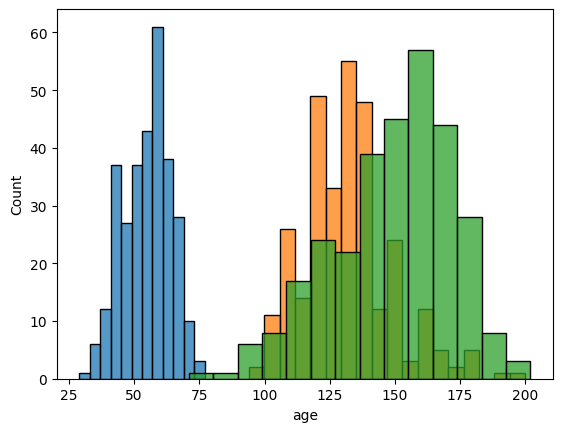

In [50]:
sns.histplot(data=heart_data,x=heart_data["age"])
sns.histplot(data=heart_data,x=heart_data["trestbps"])
sns.histplot(data=heart_data,x=heart_data["thalach"])
plt.show()

In [51]:
x = heart_data.iloc[:,:-1]
y = heart_data["target"]

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# for col in x.columns:
#     x[col] = scaler.fit_transform(heart_data[[col]])


In [52]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

#### LOGISTIC REGRESSION MODEL

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)


C:\Users\satwi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
lr.score(x_train,y_train),lr.score(x_test,y_test)

(0.8636363636363636, 0.8852459016393442)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = lr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100,"%\n")
print("Report:",classification_report(y_test,y_pred))

[[25  4]
 [ 3 29]]
Accuracy: 88.52459016393442 %

Report:               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### SAVING THE MODEL ✈️

In [64]:
import pickle
pickle.dump(lr,open("heart_disease_model.pkl","wb"))


#### SVC MODEL

In [57]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)


SVC()

In [58]:
svc.score(x_test,y_test)

0.7049180327868853

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100,"%\n")
print("Report:",classification_report(y_test,y_pred))

[[15 14]
 [ 4 28]]
Accuracy: 70.49180327868852 %

Report:               precision    recall  f1-score   support

           0       0.79      0.52      0.62        29
           1       0.67      0.88      0.76        32

    accuracy                           0.70        61
   macro avg       0.73      0.70      0.69        61
weighted avg       0.73      0.70      0.69        61



#### RANDOM FOREST MODEL

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [61]:
rf.score(x_test,y_test)

0.8360655737704918

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred)*100,"%\n")
print("Report:",classification_report(y_test,y_pred))


[[25  4]
 [ 6 26]]
Accuracy: 83.60655737704919 %

Report:               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [63]:
import pickle
pickle.dump(rf,open("heart_disease_model.pkl","wb"))
